### 归一化

#### 最大值最小值归一化

In [ ]:
import numpy as np
x_1 = np.random.randint(1,10,size = 10)
x_2 = np.random.randint(100,300,size = 10)
x = np.c_[x_1,x_2]


print('归一化之前的数据：')
display(x)


x_ = (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0))
print('归一化之后的数据：')
display(x_)

In [ ]:
# 离群点演示
x[-1,-1] *= 10000
x

In [ ]:
x_ = (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0))
print('归一化之后的数据：')
display(x_)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
x_1 = np.random.randint(1,10,size = 10)
x_2 = np.random.randint(100,300,size = 10)
x = np.c_[x_1,x_2]
print('归一化之前的数据：')
display(x)

min_max_scaler = MinMaxScaler()
x_ = min_max_scaler.fit_transform(x)
print('归一化之后的数据：')
display(x_)

#### 0-均值标准化

In [ ]:
import numpy as np
x_1 = np.random.randint(1,10,size = 10)
x_2 = np.random.randint(100,300,size = 10)
x = np.c_[x_1,x_2]
print('归一化之前的数据：')
display(x)
x_ = (x - x.mean(axis = 0)) / x.std(axis = 0)
print('归一化之后的数据：')
display(x_)

In [ ]:
x[-1,-1]*= 10000
display(x)
x_ = (x - x.mean(axis = 0)) / x.std(axis = 0)
print('归一化之后的数据：')
display(x_)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
x_1 = np.random.randint(1,10,size = 10)
x_2 = np.random.randint(100,300,size = 10)
x = np.c_[x_1,x_2]
print('归一化之前的数据：')
display(x)

standard_scaler = StandardScaler()
x_ = standard_scaler.fit_transform(x)
print('归一化之后的数据：')
display(x_)

#### scaler持久化

In [ ]:
# 训练数据
import numpy as np
from sklearn.preprocessing import StandardScaler
x_1 = np.random.randint(1,10,size = 10)
x_2 = np.random.randint(100,300,size = 10)
x = np.c_[x_1,x_2]
print('归一化之前的数据：')
display(x)
standard_scaler = StandardScaler() # 模型，归一化
x_ = standard_scaler.fit_transform(x)
print('归一化之后的数据：')
display(x_)

In [ ]:
# 归一化的模型，保存
import joblib
joblib.dump(standard_scaler,'scaler')

In [ ]:
# 加载
X_new = np.array([[7,256]])
scaler = joblib.load('./scaler')
scaler.transform(X_new)

### 正则化

In [ ]:
# 测试数据发生变换
import numpy as np
X1 = np.array([32,128])
X2 = np.array([30,120])
display(X1,X2)

In [ ]:
y1 = 0.3 * 32 + 0.4 * 128 + 0.5
y2 = 0.3 * 30 + 0.4 * 120 + 0.5
print(y1 - y2)

In [ ]:
y1 = 3 * 32 + 4 * 128 + 5
y2 = 3 * 30 + 4 * 120 + 5
print(y1 - y2)

#### Lasso回归L1正则化

不同$\alpha$ 对 L1正则化方框大小影响

In [ ]:
import matplotlib.pyplot as plt

# α 的值是：1
# 1 = x + y
# y = 1 -x
f = lambda x : 1- x
x = np.linspace(0,1,100)
plt.axis('equal')
plt.plot(x, f(x), color = 'green',label = '$\\alpha = 1$')
plt.plot(x, -f(x),color = 'green')
plt.plot(-x,f(x),color = 'green')
plt.plot(-x,-f(x),color = 'green')

# α 的值是：3
# 1 = 3 * x + 3 * y
# y = 1/3 -x
f2 = lambda x : 1/3 - x 
x2 = np.linspace(0,1/3,100)
plt.plot(x2, f2(x2),color = 'red',label = '$\\alpha = 3$')
plt.plot(x2, -f2(x2),color = 'red')
plt.plot(-x2,f2(x2),color = 'red')
plt.plot(-x2,-f2(x2),color = 'red')

# 一些列设置
plt.xlim(-2,2)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('None')  # 将图片的右框隐藏
ax.spines['top'].set_color('None')  # 将图片的上边框隐藏
ax.spines['bottom'].set_position(('data', 0)) # x轴出现在y轴的-1 位置
ax.spines['left'].set_position(('data', 0))
plt.legend()

#### Lasso回归实战

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor,LinearRegression

# 1、创建数据集X，y
X = 2*np.random.rand(100, 20)
w = np.random.randn(20,1)
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)

In [ ]:
linear = LinearRegression()
linear.fit(X,y)
print('普通线性回归系数：\n',linear.coef_)
print('线性回归截距是：',linear.intercept_)

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
print('L1正则化系数：\n',lasso.coef_)
print('L1正则化截距：',lasso.intercept_)

In [ ]:
sgd = SGDRegressor(penalty='l1',alpha=0.1)
sgd.fit(X,y.ravel())
print('随机梯度下降系数是：',sgd.coef_)
print('截距是：',sgd.intercept_)

#### Ridge回归L2正则化

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# 1、创建数据集X，y
X = 2*np.random.rand(100, 5)
w = np.random.randint(1,10,size = (5,1))
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)

In [ ]:
linear = LinearRegression()
linear.fit(X,y)
print('普通线性回归系数：',linear.coef_,linear.intercept_)

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X,y)
print('L2正则化Ridge系数是：',ridge.coef_,ridge.intercept_)

#### 弹性网络优化算法

In [ ]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor,LinearRegression

# 1、创建数据集X，y
X = 2*np.random.rand(100, 20)
w = np.random.randn(20,1)
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)

In [ ]:
linear = LinearRegression()
linear.fit(X,y)
print('普通线性回归系数：',linear.coef_,linear.intercept_)

In [ ]:
model = ElasticNet(alpha=1,l1_ratio=0.1)

model.fit(X,y)
print('弹性网络系数：',model.coef_,model.intercept_)

In [ ]:
# 随机梯度下降，变化为:Ridge、Lasso、ElasticNet
sgd = SGDRegressor(penalty='elasticnet',alpha=1,l1_ratio=0.1)
sgd.fit(X,y.ravel())
print('随机梯度下降，惩罚项，正则项参数给定：',sgd.coef_,sgd.intercept_)

In [ ]:
y

### 多项式回归

#### 普通线性回归

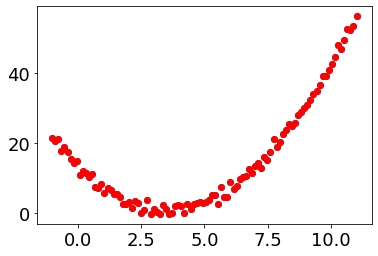

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1、创建数据，并进行可视化
X = np.linspace(-1,11,num = 100)
y = (X - 5)**2 + 3*X -12 + np.random.randn(100)
X = X.reshape(-1,1)
plt.scatter(X,y)

# 2、创建预测数据
X_test = np.linspace(-2,12,num = 200).reshape(-1,1)
plt.scatter(X,y,color = 'red')

In [ ]:
model = LinearRegression()
model.fit(X,y) # 建模，线性回归
y_pred = model.predict(X_test)
plt.scatter(X,y,color = 'red')
plt.plot(X_test,y_pred,color = 'g')
print(model.coef_,model.intercept_)

In [ ]:
# 特征升维
X_ = np.c_[X,X**2]
model.fit(X_,y)
print(model.coef_,model.intercept_)
# 预测
X_test_ = np.c_[X_test,X_test**2]
y_pred = model.predict(X_test_)
plt.scatter(X,y,color = 'red')
plt.plot(X_test,y_pred,color = 'g')

#### 随机梯度下降

In [113]:
from sklearn.linear_model import SGDRegressor
# 构造新特征
from sklearn.preprocessing import PolynomialFeatures

In [114]:
ploy = PolynomialFeatures(interaction_only=False)
X_poly = ploy.fit_transform(X) # degree 2 :0次幂、1幂次、2次幂
X_poly

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -8.78787879e-01,  7.72268136e-01],
       [ 1.00000000e+00, -7.57575758e-01,  5.73921028e-01],
       [ 1.00000000e+00, -6.36363636e-01,  4.04958678e-01],
       [ 1.00000000e+00, -5.15151515e-01,  2.65381084e-01],
       [ 1.00000000e+00, -3.93939394e-01,  1.55188246e-01],
       [ 1.00000000e+00, -2.72727273e-01,  7.43801653e-02],
       [ 1.00000000e+00, -1.51515152e-01,  2.29568411e-02],
       [ 1.00000000e+00, -3.03030303e-02,  9.18273646e-04],
       [ 1.00000000e+00,  9.09090909e-02,  8.26446281e-03],
       [ 1.00000000e+00,  2.12121212e-01,  4.49954086e-02],
       [ 1.00000000e+00,  3.33333333e-01,  1.11111111e-01],
       [ 1.00000000e+00,  4.54545455e-01,  2.06611570e-01],
       [ 1.00000000e+00,  5.75757576e-01,  3.31496786e-01],
       [ 1.00000000e+00,  6.96969697e-01,  4.85766758e-01],
       [ 1.00000000e+00,  8.18181818e-01,  6.69421488e-01],
       [ 1.00000000e+00,  9.39393939e-01

In [115]:
from sklearn.preprocessing import StandardScaler

[  0.         -24.37014729  36.17833614] [15.29923409]


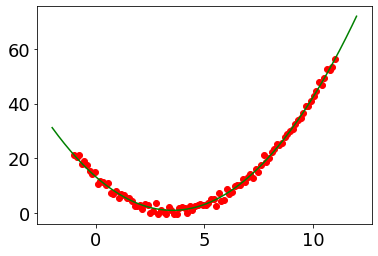

In [121]:
sgd  = SGDRegressor(eta0=0.1,fit_intercept=True)
scaler = StandardScaler()
X_poly_scale = scaler.fit_transform(X_poly)
sgd.fit(X_poly_scale,y)

X_test_poly = ploy.transform(X_test)
X_test_poly_scale = scaler.transform(X_test_poly)

y_pred = sgd.predict(X_test_poly_scale)
plt.scatter(X,y,color = 'red')
plt.plot(X_test,y_pred,color = 'g')
print(sgd.coef_,sgd.intercept_)

In [ ]:
np.set_printoptions(suppress = True)

In [ ]:
X_poly

In [ ]:
X_train = np.random.randint(0,10,size = (10,2))
X_train

In [ ]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
poly.fit_transform(X_train)

In [ ]:
poly = PolynomialFeatures(degree=2,interaction_only=False)
poly.fit_transform(X_train)

### 天猫双十一销量预测

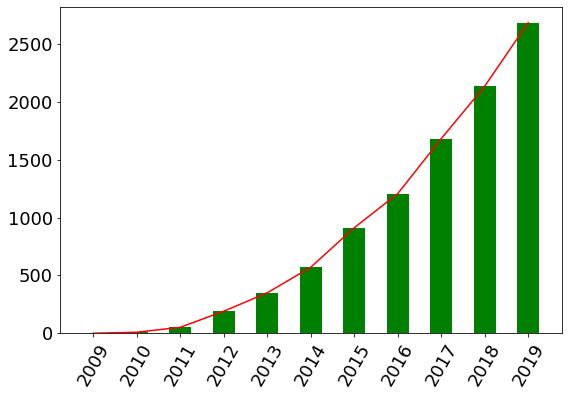

In [7]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.figure(figsize=(9,6))

# 创建数据，年份数据2009 ~ 2019
X = np.arange(2009,2020)
y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])
plt.bar(X,y,width = 0.5,color = 'green')
plt.plot(X,y,color = 'red')
_ = plt.xticks(ticks = X,rotation = 60)

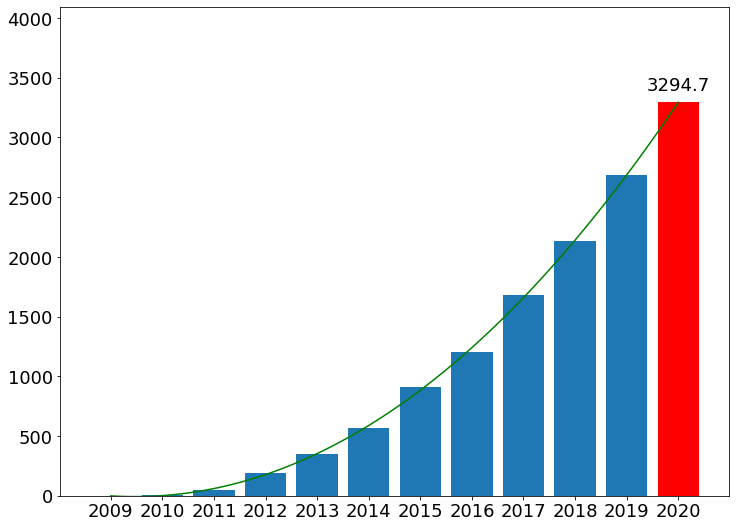

In [18]:
# 均值移除
X_ = X - X.mean() # -5,-4,…… 3,4,5
X_ = X_.reshape(-1,1)
# 特征升维
poly = PolynomialFeatures(degree=3,interaction_only=False)
X_poly = poly.fit_transform(X_)
# 归一化
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_poly)

# 建模
model = SGDRegressor(penalty='l2',eta0=0.5,max_iter=5000)
model.fit(X_norm,y)

# 数据预测
# 6 代表2020年
X_test = np.linspace(-5,6,100).reshape(-1,1)
X_test_poly = poly.transform(X_test)
X_test_norm = scaler.transform(X_test_poly)
y_pred = model.predict(X_test_norm)

# 可视化
plt.figure(figsize=(12,9))
plt.plot(X_test_poly[:,1],y_pred,color = 'green')
plt.bar(X_poly[:,1],y) # 2009-2019历史数据
# 算法预测 2020年销量
plt.bar(6,y_pred[-1],color = 'red') # 5表示2019年，6表示2020年
plt.text(6,y_pred[-1] + 100,round(y_pred[-1],1),ha = 'center')
plt.ylim(0,4096)
_ = plt.xticks(np.arange(-5,7),np.arange(2009,2021))

In [19]:
model.coef_

array([  0.        , 838.52548798, 266.29421719,   8.39223811])

In [20]:
model.intercept_

array([890.11486705])

### 中国人寿保费预测【实战】

#### 数据加载介绍

In [45]:
import numpy as np
import pandas as pd
data = pd.read_excel('./中国人寿.xlsx')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### EDA数据探索

In [46]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:xlabel='charges', ylabel='Density'>

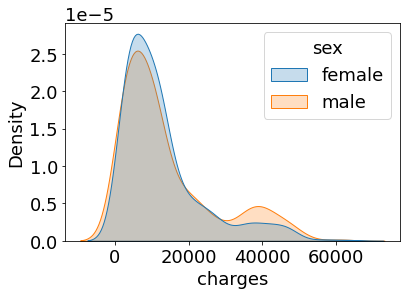

In [48]:
# 数据分布概率密度可视化
import seaborn as sns
# 性别对保费影响
sns.kdeplot(data['charges'],shade = True,hue = data['sex'])


<AxesSubplot:xlabel='charges', ylabel='Density'>

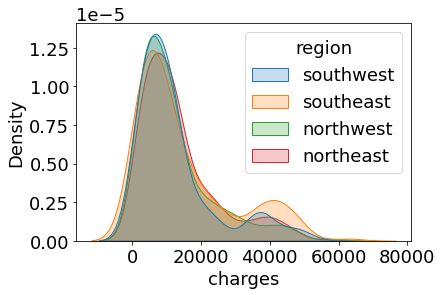

In [49]:
# 地区对保费影响
sns.kdeplot(data['charges'],shade = True,hue = data['region'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

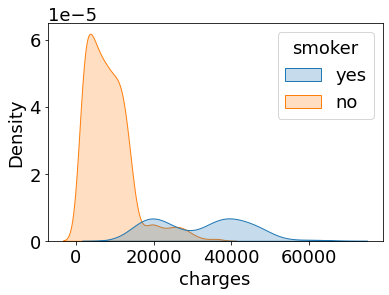

In [50]:
# 吸烟对保费影响
sns.kdeplot(data['charges'],shade = True,hue = data['smoker'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

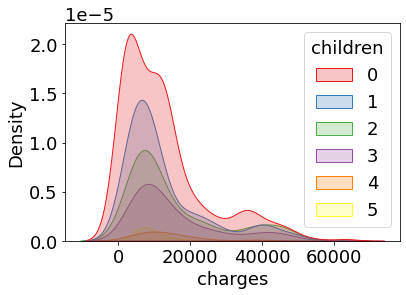

In [51]:
# 孩子数量对保费影响
sns.kdeplot(data['charges'],shade = True,hue = data['children'],palette='Set1')

#### 特征工程

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
data = data.drop(['region', 'sex'], axis=1)
data.head() # 删除不重要特征,目标值，区分度，不大！！！

# 延伸，二值化
# 不同level A、B、C、D、E、F（精细）
# 体重指数，离散化转换，体重两种情况：标准、肥胖
def convert(df,bmi):
    df['bmi'] = 'fat' if df['bmi'] >= bmi else 'standard'
    return df
data = data.apply(convert, axis = 1, args=(30,))
display(data.head())

# 特征提取，离散型数据转换为数值型数据
data = pd.get_dummies(data)
display(data.head())

# 特征和目标值抽取
X = data.drop('charges', axis=1) # 训练数据
y = data['charges'] # 目标值
X.head()

,age,bmi,children,smoker,charges
0,19,standard,0,yes,16884.92400
1,18,fat,1,no,1725.55230
2,28,fat,3,no,4449.46200
3,33,standard,0,no,21984.47061
4,32,standard,0,no,3866.85520


,age,children,charges,bmi_fat,bmi_standard,smoker_no,smoker_yes
0,19,0,16884.92400,0,1,0,1
1,18,1,1725.55230,1,0,1,0
2,28,3,4449.46200,1,0,1,0
3,33,0,21984.47061,0,1,1,0
4,32,0,3866.85520,0,1,1,0


,age,children,bmi_fat,bmi_standard,smoker_no,smoker_yes
0,19,0,0,1,0,1
1,18,1,1,0,1,0
2,28,3,1,0,1,0
3,33,0,0,1,1,0
4,32,0,0,1,1,0


#### 特征升维

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_squared_log_error

# 数据拆分
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1024)

# 特征升维
poly = PolynomialFeatures(degree= 2, include_bias = False,interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
display(X_train_poly[:5],)
print('升维之前：',X_train.shape)
print('升维之后：',X_train_poly.shape)

array([[6.000e+01, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.600e+03, 0.000e+00, 0.000e+00, 6.000e+01, 6.000e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00],
       [2.800e+01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        7.840e+02, 2.800e+01, 2.800e+01, 0.000e+00, 0.000e+00, 2.800e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00],
       [5.700e+01, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.249e+03, 0.000e+00, 0.000e+00, 5.700e+01, 5.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00

升维之前： (1070, 6)
升维之后： (1070, 27)


#### 模型训练与评估

<font color = 'red' size = 6>$$\text MSLE = \frac{1}{n} \sum\limits_{i=1}^{n} (\log(y_i + 1) - \log(\hat{y}_i + 1))^2$$</font>

<font size = 6 color = 'red'>$$\text MSE = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$$</font>

##### 普通线性回归

In [96]:
model = LinearRegression()
model.fit(X_train_poly,y_train)

print('训练数据表现：',model.score(X_train_poly,y_train))
print('测试数据表现：',model.score(X_test_poly,y_test))

print('训练数据MSE：',mean_squared_error(y_train,model.predict(X_train_poly)))
print('测试数据MSE：',mean_squared_error(y_test, model.predict(X_test_poly)))

print('训练数据MSLE：',mean_squared_log_error(y_train,model.predict(X_train_poly)))
print('测试数据MSLE：',mean_squared_log_error(y_test, model.predict(X_test_poly)))

训练数据表现： 0.8628646942053988
测试数据表现： 0.8688687556547094
训练数据MSE： 20429654.144572377
测试数据MSE： 17928489.228876505
训练数据MSLE： 0.16725245624632998
测试数据MSLE： 0.14778538307479278


In [97]:
# 未进行特征升维建模预测表现
model = LinearRegression()
model.fit(X_train,y_train)

print('训练数据表现：',model.score(X_train,y_train))
print('测试数据表现：',model.score(X_test,y_test))

print('训练数据MSE：',mean_squared_error(y_train,model.predict(X_train)))
print('测试数据MSE：',mean_squared_error(y_test, model.predict(X_test)))

print('训练数据MSLE：',mean_squared_log_error(y_train,model.predict(X_train)))
print('测试数据MSLE：',mean_squared_log_error(y_test, model.predict(X_test)))

训练数据表现： 0.7535598431225086
测试数据表现： 0.7509918136220449
训练数据MSE： 36713282.135252416
测试数据MSE： 34044827.4525931
训练数据MSLE： 0.46480454944015676
测试数据MSLE： 0.4546333569181187


##### 弹性网络

In [110]:
# 升维后的数据，特征变多了
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
# X_train_poly_norm = scaler.fit_transform(X_train_poly)
# X_test_poly_norm = scaler.transform(X_test_poly)
model = ElasticNet(alpha=0.1,l1_ratio=0.3,max_iter=1000)
model.fit(X_train_poly,y_train)

print('训练数据表现：',model.score(X_train_poly,y_train))
print('测试数据表现：',model.score(X_test_poly,y_test))

print('训练数据MSE：',mean_squared_error(y_train,model.predict(X_train_poly)))
print('测试数据MSE：',mean_squared_error(y_test, model.predict(X_test_poly)))

print('训练数据MSLE：',mean_squared_log_error(y_train,model.predict(X_train_poly)))
print('测试数据MSLE：',mean_squared_log_error(y_test, model.predict(X_test_poly)))

训练数据表现： 0.8381452609108763
测试数据表现： 0.8383353402187568
训练数据MSE： 24112217.65315067
测试数据MSE： 22103070.294567037
训练数据MSLE： 0.23723473691713873
测试数据MSLE： 0.2200604259529775


In [111]:
# 未进行特征升维建模预测表现
model = ElasticNet(alpha=0.1,l1_ratio=0.3,max_iter=1000)
model.fit(X_train,y_train)

print('训练数据表现：',model.score(X_train,y_train))
print('测试数据表现：',model.score(X_test,y_test))

print('训练数据MSE：',mean_squared_error(y_train,model.predict(X_train)))
print('测试数据MSE：',mean_squared_error(y_test, model.predict(X_test)))

print('训练数据MSLE：',mean_squared_log_error(y_train,model.predict(X_train)))
print('测试数据MSLE：',mean_squared_log_error(y_test, model.predict(X_test)))

训练数据表现： 0.7338230829984274
测试数据表现： 0.7333122794815511
训练数据MSE： 39653554.74363014
测试数据MSE： 36462003.76318137
训练数据MSLE： 0.27434858130977796
测试数据MSLE： 0.26273031558352794
